<a href="https://colab.research.google.com/github/allandevbr92/MyResume/blob/master/varejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
# Imports

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd


## Carregando os Dados

In [6]:
# Carrega o dataset


df = pd.read_csv('/content/drive/MyDrive/varejo/dataset.csv', encoding='ISO-8859-1', delimiter=',')

In [7]:
# Shape


df.shape

(9700, 11)

In [9]:
# Amostra dos dados

df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Análise Exploratória

In [11]:
# Colunas do conjunto de dados

df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [13]:
# Verificando o tipo de dado de cada coluna

df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [14]:
# Resumo estatístico da coluna com o valor de venda

df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [16]:
# Verificando se há registros duplicados

df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [17]:
# Verificando de há valores ausentes

df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [56]:
# Primeiro filtramos o dataframe com os registros da categoria que desejamos
df_p1 = df[df['Categoria'] == 'Office Supplies']

# Em seguida agrupamos por cidade e calculamos o total de valor_venda
df_p1_total = df_p1.groupby('Cidade')['Valor_Venda'].sum()

# Então encontramos a cidade com maior valor de venda
cidade_maior_venda = df_p1_total.idxmax()
print("Cidade com maior valor de venda para 'Office Supplies':", cidade_maior_venda)

# Para conferir o resultado
df_p1_total.sort_values(ascending = False)

Cidade com maior valor de venda para 'Office Supplies': New York City


Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

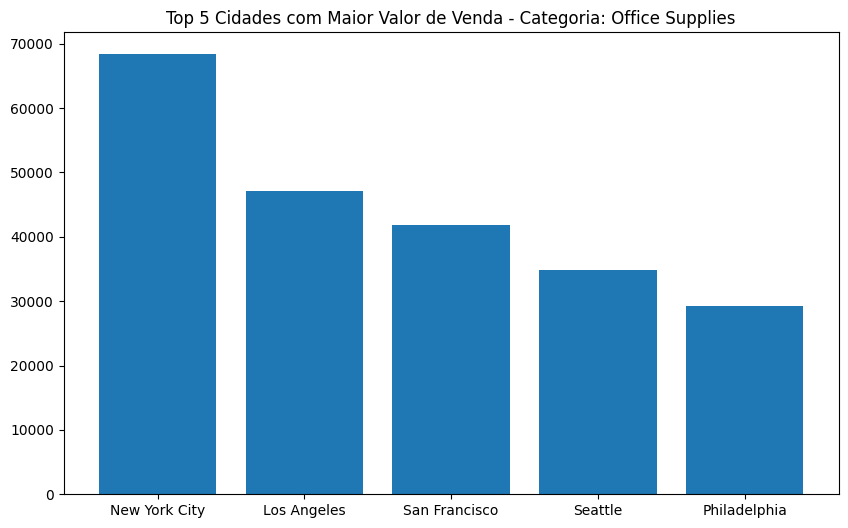

In [26]:
# Pergunta de Negócio 1: Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?
categoria = 'Office Supplies'
df_office_supplies = df[df['Categoria'] == categoria]
df_agrupado = df_office_supplies.groupby('Cidade')['Valor_Venda'].sum().reset_index()
df_top_cidades = df_agrupado.nlargest(5, 'Valor_Venda')  # Selecionar apenas o top 5 de cidades com maiores valores de venda
df_top_cidades = df_top_cidades.sort_values('Valor_Venda', ascending=False)  # Ordenar do maior para o menor

# Visualização: Gráfico de barras verticais para o top 5
plt.figure(figsize=(10, 6))
plt.bar(df_top_cidades['Cidade'], df_top_cidades['Valor_Venda'])
plt.xlabel('')
plt.ylabel('')
plt.title('Top 5 Cidades com Maior Valor de Venda - Categoria: Office Supplies')
plt.xticks(rotation=0)
plt.show()


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?



In [60]:
# Calculamos o total de vendas para cada data de pedido
df_p2 = df.groupby('Data_Pedido')['Valor_Venda'].sum()

In [66]:
df_p2.head()

Data_Pedido
2015-01-03      16.448
2015-01-04     288.060
2015-01-05      19.536
2015-01-06    4407.100
2015-01-07      87.158
Name: Valor_Venda, dtype: float64

Obs: Estamos aqui tratando data de pedido como variável categórica e não como série temporal. Se a pergunta fosse "ao longo do tempo" essa resposta não seria a ideal.

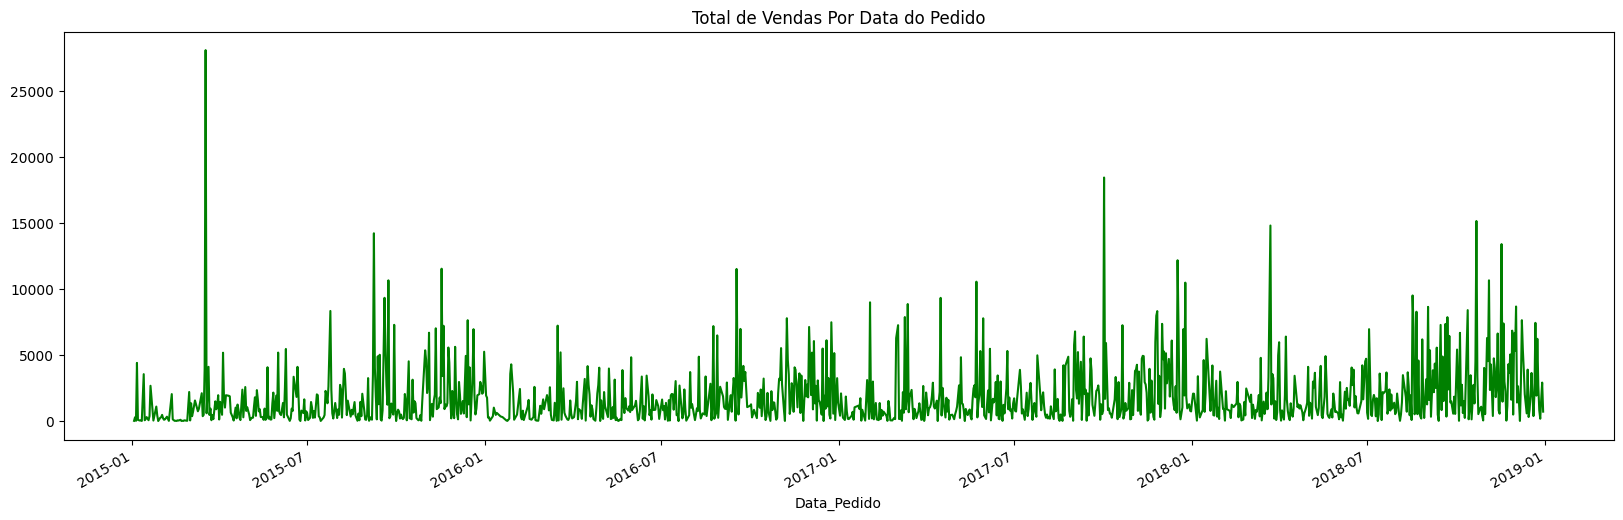

In [68]:
# Plot
plt.figure(figsize = (20, 6))
df_p2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?



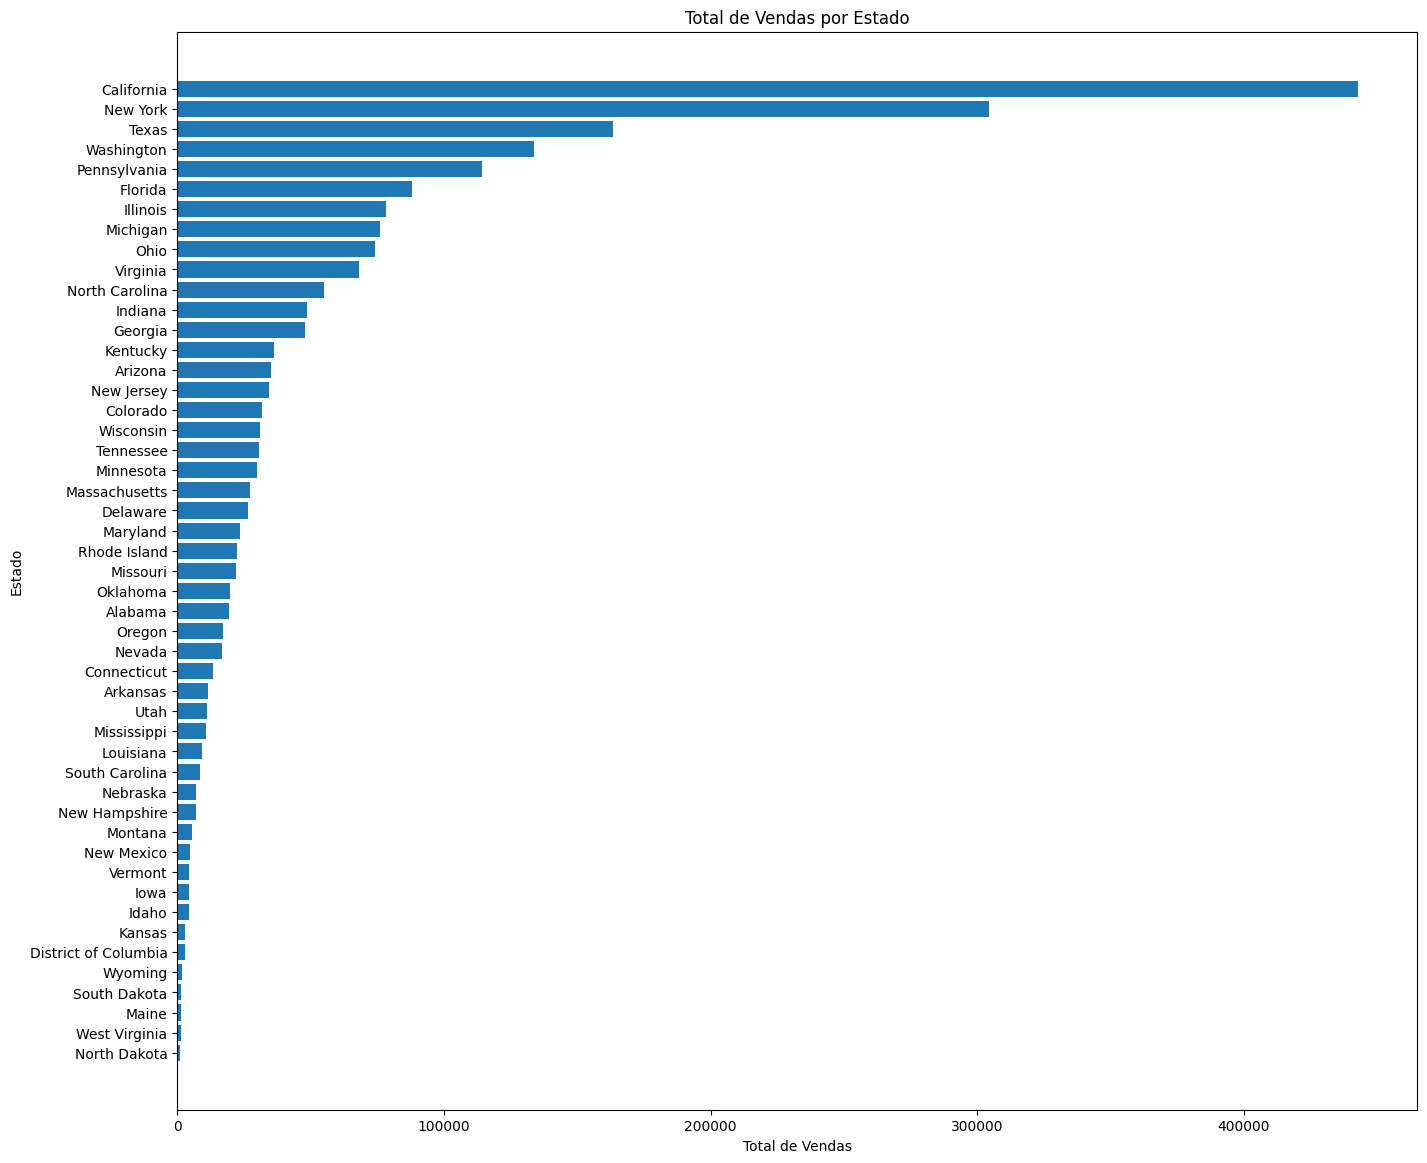

In [34]:
# Calcular o total de vendas por estado
total_vendas_estado = df.groupby('Estado')['Valor_Venda'].sum().reset_index()

# Ordenar os dados por valor de vendas de forma decrescente
total_vendas_estado = total_vendas_estado.sort_values('Valor_Venda', ascending=True)

# Visualização: Gráfico de barras horizontais
plt.figure(figsize=(16, 14))
plt.barh(total_vendas_estado['Estado'], total_vendas_estado['Valor_Venda'])
plt.xlabel('Total de Vendas')
plt.ylabel('Estado')
plt.title('Total de Vendas por Estado')
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

In [76]:
# Agrupamos por cidade, calculamos o total de vendas e ordenamos listando somente os 10 primeiros registros

df_p4 = df.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',
                                                                                    ascending = False).head(10)


In [77]:
df_p4.head(10)


,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


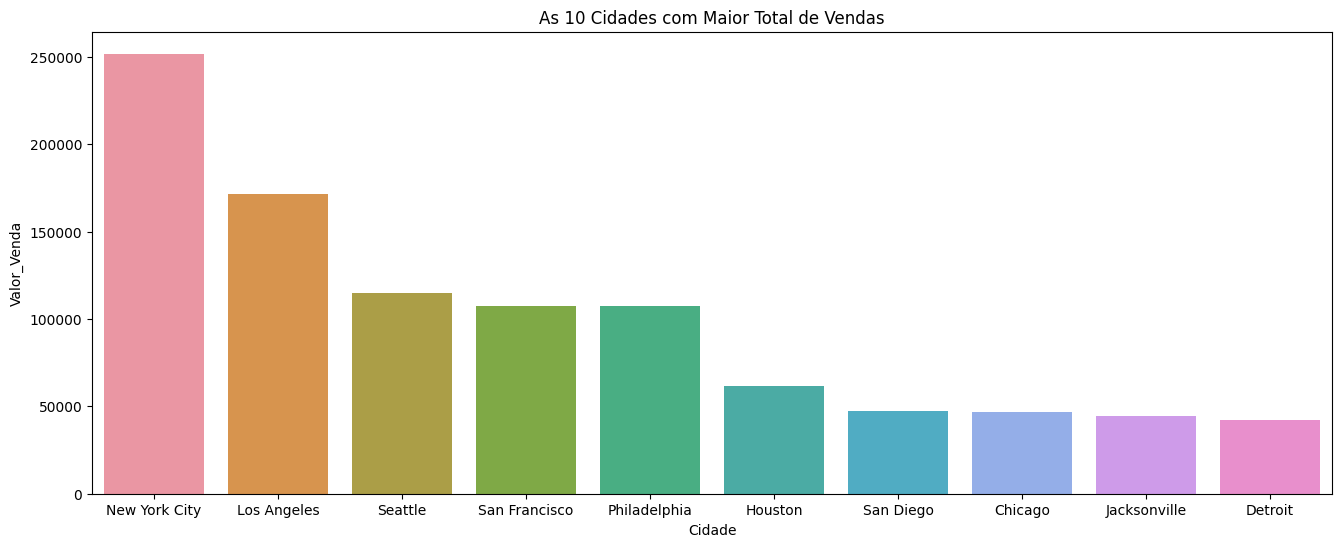

In [82]:
# Plot
plt.figure(figsize = (16, 6))
sns.set_palette('coolwarm')
sns.barplot(data = df_p4,
            y = 'Valor_Venda',
            x = 'Cidade').set(title = 'As 10 Cidades com Maior Total de Vendas')
plt.show()